In [1]:
# https://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_tutorials.html

In [2]:
import cv2
import os, sys
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

# Changing Color-space
> For color conversion, we use the function cv2.cvtColor(input_image, flag) where flag determines the type of conversion.

> For BGR -> Gray conversion we use the flags cv2.COLOR_BGR2GRAY. 

> Similarly for BGR -> HSV, we use the flag cv2.COLOR_BGR2HSV. 

>To get other flags, just run following commands in your Python terminal :

In [3]:
flags = [i for i in dir(cv2) if i.startswith('COLOR_')]
# print(flags)

# Object Tracking

In [4]:
# import cv2
# import numpy as np

# cap = cv2.VideoCapture(0)

# while(1):

#     # Take each frame
#     _, frame = cap.read()

#     # Convert BGR to HSV
#     hsv = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)

#     # define range of blue color in HSV
#     lower_blue = np.array([110,50,50])
#     upper_blue = np.array([130,255,255])

#     # Threshold the HSV image to get only blue colors
#     mask = cv2.inRange(hsv, lower_blue, upper_blue)

#     # Bitwise-AND mask and original image
#     res = cv2.bitwise_and(frame,frame, mask= mask)

#     cv2.imshow('frame',frame)
#     cv2.imshow('mask',mask)
#     cv2.imshow('res',res)
#     k = cv2.waitKey(5) & 0xFF
#     if k == 27:
#         break

# cv2.destroyAllWindows()

### How to find HSV values to track?

In [5]:
g = np.uint8([[[0,255,0 ]]])
hsv_g = cv2.cvtColor(g,cv2.COLOR_BGR2HSV)
print(hsv_g)

# Now you take [H-10, 100,100] and [H+10, 255, 255] as lower bound and upper bound respectively.

[[[ 60 255 255]]]


# Simple Thresholding



127.0 (4608, 3456)
127.0 (4608, 3456)
127.0
127.0
127.0


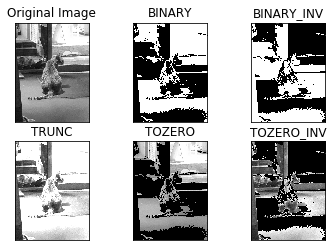

In [6]:
img = cv2.imread('./data/cat.jpg',0)
ret,thresh1 = cv2.threshold(img,127,255,cv2.THRESH_BINARY)
print(ret,thresh1.shape)
ret,thresh2 = cv2.threshold(img,127,255,cv2.THRESH_BINARY_INV)
print(ret,thresh2.shape)
ret,thresh3 = cv2.threshold(img,127,255,cv2.THRESH_TRUNC)
print(ret)
ret,thresh4 = cv2.threshold(img,127,255,cv2.THRESH_TOZERO)
print(ret)
ret,thresh5 = cv2.threshold(img,127,255,cv2.THRESH_TOZERO_INV)
print(ret)
titles = ['Original Image','BINARY','BINARY_INV','TRUNC','TOZERO','TOZERO_INV']
images = [img, thresh1, thresh2, thresh3, thresh4, thresh5]

for i in range(6):
    plt.subplot(2,3,i+1),plt.imshow(images[i],'gray')
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])

plt.show()

### Adaptive Thresholding
> Adaptive Method - It decides how thresholding value is calculated.
>> cv2.ADAPTIVE_THRESH_MEAN_C : threshold value is the mean of neighbourhood area.
>> cv2.ADAPTIVE_THRESH_GAUSSIAN_C : threshold value is the weighted sum of neighbourhood values where weights are a gaussian window.

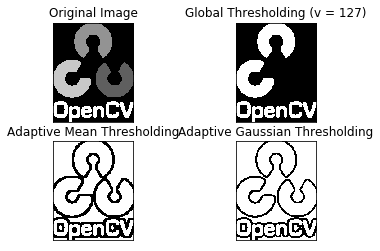

In [7]:
img = cv2.imread('./data/opencv_logo.png',0)
img = cv2.medianBlur(img,5)

ret,th1 = cv2.threshold(img,127,255,cv2.THRESH_BINARY)
th2 = cv2.adaptiveThreshold(img,255,cv2.ADAPTIVE_THRESH_MEAN_C,\
            cv2.THRESH_BINARY,11,2)
th3 = cv2.adaptiveThreshold(img,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,\
            cv2.THRESH_BINARY,11,2)

titles = ['Original Image', 'Global Thresholding (v = 127)',
            'Adaptive Mean Thresholding', 'Adaptive Gaussian Thresholding']
images = [img, th1, th2, th3]

for i in range(4):
    plt.subplot(2,2,i+1),plt.imshow(images[i],'gray')
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])
plt.show()

### Otsu’s Binarization

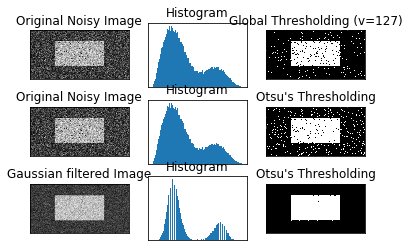

In [8]:
img = cv2.imread('./data/noisy2.png',0)

# global thresholding
ret1,th1 = cv2.threshold(img,127,255,cv2.THRESH_BINARY)

# Otsu's thresholding
ret2,th2 = cv2.threshold(img,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)

# Otsu's thresholding after Gaussian filtering
blur = cv2.GaussianBlur(img,(5,5),0)
ret3,th3 = cv2.threshold(blur,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)

# plot all the images and their histograms
images = [img, 0, th1,
          img, 0, th2,
          blur, 0, th3]
titles = ['Original Noisy Image','Histogram','Global Thresholding (v=127)',
          'Original Noisy Image','Histogram',"Otsu's Thresholding",
          'Gaussian filtered Image','Histogram',"Otsu's Thresholding"]

for i in range(3):
    plt.subplot(3,3,i*3+1),plt.imshow(images[i*3],'gray')
    plt.title(titles[i*3]), plt.xticks([]), plt.yticks([])
    plt.subplot(3,3,i*3+2),plt.hist(images[i*3].ravel(),256)
    plt.title(titles[i*3+1]), plt.xticks([]), plt.yticks([])
    plt.subplot(3,3,i*3+3),plt.imshow(images[i*3+2],'gray')
    plt.title(titles[i*3+2]), plt.xticks([]), plt.yticks([])
# plt.show()

# Geometric Transformations of Images
https://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_imgproc/py_geometric_transformations/py_geometric_transformations.html#transformations

### Scaling

(280, 450, 3)
(1120, 450, 3)


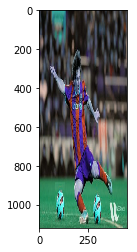

In [9]:
img = cv2.imread('./data/roi.jpg')
print(img.shape)
# Resize way 1
res = cv2.resize(img,None,fx=1, fy=4, interpolation = cv2.INTER_CUBIC)

# Resize way 2 
# height, width = img.shape[:2]
# res = cv2.resize(img,(2*width, 2*height), interpolation = cv2.INTER_CUBIC)

print(res.shape)  # x*1 y*4
plt.imshow(res)

### Translation

280 450


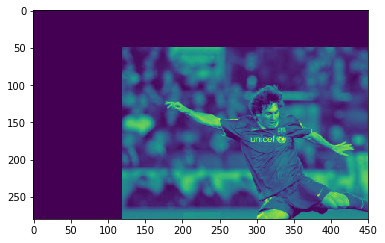

In [10]:
img = cv2.imread('./data/roi.jpg',0)
rows,cols = img.shape
print(rows, cols) #h, w
M = np.float32([[1,0,120],[0,1,50]])
dst = cv2.warpAffine(img,M,(cols,rows))

plt.imshow(dst)

### Rotation

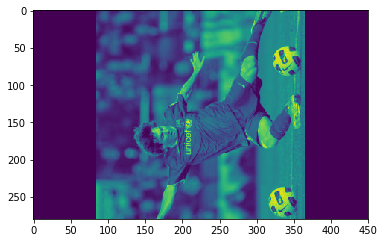

In [11]:
M = cv2.getRotationMatrix2D((cols/2,rows/2),90,1)
dst = cv2.warpAffine(img,M,(cols,rows))
plt.imshow(dst)

### Affine Transformation

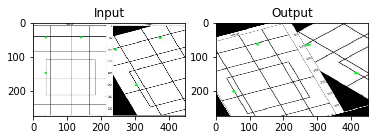

In [12]:
img = cv2.imread('./data/affine.jpg')  # just check the left one
rows,cols,ch = img.shape

pts1 = np.float32([[50,50],[200,50],[50,200]])
pts2 = np.float32([[10,100],[200,50],[100,250]])

M = cv2.getAffineTransform(pts1,pts2)

dst = cv2.warpAffine(img,M,(cols,rows))

plt.subplot(121),plt.imshow(img),plt.title('Input')
plt.subplot(122),plt.imshow(dst),plt.title('Output')
plt.show()

### Perspective Transformation

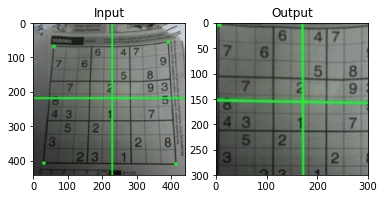

In [13]:
img = cv2.imread('./data/sudokusmall.png')
rows,cols,ch = img.shape

pts1 = np.float32([[56,65],[368,52],[28,387],[389,390]]) # h, w
pts2 = np.float32([[0,0],[300,0],[0,300],[300,300]]) # h,w 

M = cv2.getPerspectiveTransform(pts1,pts2)

dst = cv2.warpPerspective(img,M,(300,300))

plt.subplot(1,2,1),plt.imshow(img),plt.title('Input')
plt.subplot(1,2,2),plt.imshow(dst),plt.title('Output')
plt.show()

# Smoothing Images

### 2D Convolution ( Image Filtering )
Set kernel by ourself, not use cv2's blur or somthing

(10, 10)
0.01


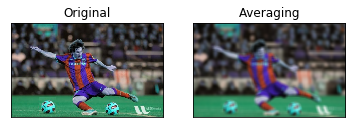

In [14]:
img = cv2.imread('./data/roi.jpg')


# Building kernel with numpy and type as float32
kernel = np.ones((10,10),np.float32)/100
print(kernel.shape)
print(kernel[0,0])
dst = cv2.filter2D(img,-1,kernel)

plt.subplot(121),plt.imshow(img),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(dst),plt.title('Averaging')
plt.xticks([]), plt.yticks([])
plt.show()

### Image Blurring (Image Smoothing)
https://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_imgproc/py_filtering/py_filtering.html

(([], <a list of 0 Text xticklabel objects>),
 ([], <a list of 0 Text yticklabel objects>))

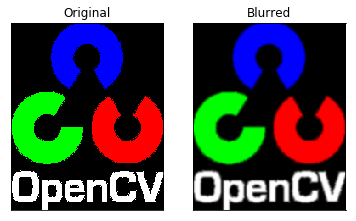

In [15]:
# 1. Averaging
img = cv2.imread('./data/opencv_logo.png')

blur = cv2.blur(img,(5,5))
blur = cv2.GaussianBlur(img,(5,5),0)
plt.subplot(121),plt.imshow(img),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(blur),plt.title('Blurred')
plt.xticks([]), plt.yticks([])

(([], <a list of 0 Text xticklabel objects>),
 ([], <a list of 0 Text yticklabel objects>))

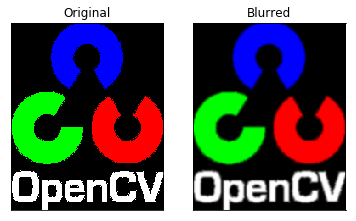

In [16]:
# 2. Gaussian Filtering
img = cv2.imread('./data/opencv_logo.png')

blur = cv2.GaussianBlur(img,(5,5),0)
plt.subplot(121),plt.imshow(img),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(blur),plt.title('Blurred')
plt.xticks([]), plt.yticks([])

(([], <a list of 0 Text xticklabel objects>),
 ([], <a list of 0 Text yticklabel objects>))

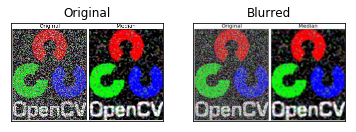

In [17]:
# 3. Median Filtering
img = cv2.imread('./data/median.jpg')

blur = cv2.GaussianBlur(img,(5,5),0)
plt.subplot(121),plt.imshow(img),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(blur),plt.title('Blurred')
plt.xticks([]), plt.yticks([])

(([], <a list of 0 Text xticklabel objects>),
 ([], <a list of 0 Text yticklabel objects>))

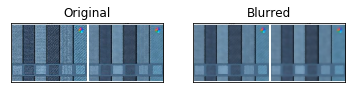

In [18]:
# 4. Bilateral Filtering
img = cv2.imread('./data/bilateral.jpg')

blur = cv2.bilateralFilter(img,9,75,75)
plt.subplot(121),plt.imshow(img),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(blur),plt.title('Blurred')
plt.xticks([]), plt.yticks([])

# Morphological Transformations

(<matplotlib.axes._subplots.AxesSubplot at 0x7f8919747cc0>,
 Text(0.5,1,'blackhat'))

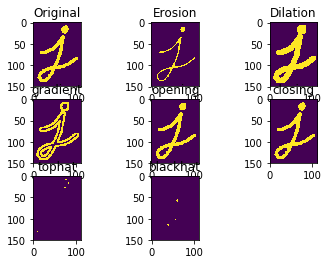

In [19]:
# Erosion / Dilation... rectangle kernel
img = cv2.imread('./data/j.png',0)
# Set kernel size and shape
kernel = np.ones((5,5),np.uint8)
#kernel = cv2.getStructuringElement(cv2.MORPH_CROSS,(5,5))

# Set transformation way
erosion = cv2.erode(img,kernel,iterations = 1)
dilation = cv2.dilate(img,kernel,iterations = 1)
gradient = cv2.morphologyEx(img, cv2.MORPH_GRADIENT, kernel)
opening = cv2.morphologyEx(img, cv2.MORPH_OPEN, kernel)
closing = cv2.morphologyEx(img, cv2.MORPH_CLOSE, kernel)
tophat = cv2.morphologyEx(img, cv2.MORPH_TOPHAT, kernel)
blackhat = cv2.morphologyEx(img, cv2.MORPH_BLACKHAT, kernel)

# Plot
plt.subplot(331),plt.imshow(img),plt.title('Original')
plt.subplot(332),plt.imshow(erosion),plt.title('Erosion')
plt.subplot(333),plt.imshow(dilation),plt.title('Dilation')
plt.subplot(334),plt.imshow(gradient),plt.title('gradient')
plt.subplot(335),plt.imshow(opening),plt.title('opening')
plt.subplot(336),plt.imshow(closing),plt.title('closing')
plt.subplot(337),plt.imshow(tophat),plt.title('tophat')
plt.subplot(338),plt.imshow(blackhat),plt.title('blackhat')

### Structuring Element

In [20]:
# Rectangular Kernel
cv2.getStructuringElement(cv2.MORPH_RECT,(5,5))

# Elliptical Kernel
cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(5,5))

# Cross-shaped Kernel
cv2.getStructuringElement(cv2.MORPH_CROSS,(5,5))

array([[0, 0, 1, 0, 0],
       [0, 0, 1, 0, 0],
       [1, 1, 1, 1, 1],
       [0, 0, 1, 0, 0],
       [0, 0, 1, 0, 0]], dtype=uint8)

# Image Gradients

In [21]:
# 1. Sobel and Scharr Derivatives
# 2. Laplacian Derivatives

(Text(0.5,1,'Sobel Y'),
 ([], <a list of 0 Text xticklabel objects>),
 ([], <a list of 0 Text yticklabel objects>))

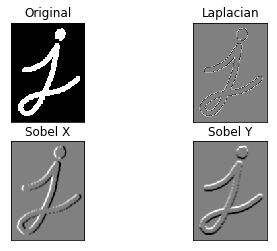

In [22]:
img = cv2.imread('./data/j.png',0)

laplacian = cv2.Laplacian(img,cv2.CV_64F)
sobelx = cv2.Sobel(img,cv2.CV_64F,1,0,ksize=5)
sobely = cv2.Sobel(img,cv2.CV_64F,0,1,ksize=5)

plt.subplot(2,2,1),plt.imshow(img,cmap = 'gray')
plt.title('Original'), plt.xticks([]), plt.yticks([])

plt.subplot(2,2,2),plt.imshow(laplacian,cmap = 'gray')
plt.title('Laplacian'), plt.xticks([]), plt.yticks([])

plt.subplot(2,2,3),plt.imshow(sobelx,cmap = 'gray')
plt.title('Sobel X'), plt.xticks([]), plt.yticks([])

plt.subplot(2,2,4),plt.imshow(sobely,cmap = 'gray')
plt.title('Sobel Y'), plt.xticks([]), plt.yticks([])

# plt.show()

In our last example, output datatype is cv2.CV_8U or np.uint8. But there is a slight problem with that. Black-to-White transition is taken as Positive slope (it has a positive value) while White-to-Black transition is taken as a Negative slope (It has negative value). So when you convert data to np.uint8, all negative slopes are made zero. In simple words, you miss that edge.


If you want to detect both edges, better option is to keep the output datatype to some higher forms, like cv2.CV_16S, cv2.CV_64F etc, take its absolute value and then convert back to cv2.CV_8U. Below code demonstrates this procedure for a horizontal Sobel filter and difference in results.

# Canny Edge Detection
https://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_imgproc/py_canny/py_canny.html

### Edge detection

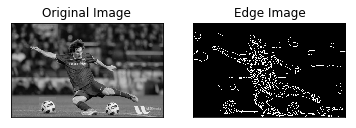

In [23]:
img = cv2.imread('./data/roi.jpg',0)
edges = cv2.Canny(img,50,200)

plt.subplot(121),plt.imshow(img,cmap = 'gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(edges,cmap = 'gray')
plt.title('Edge Image'), plt.xticks([]), plt.yticks([])

plt.show()

In [24]:
img = cv2.imread('./data/roi.jpg')

G = img.copy()
gp = [G]
for i in range(6):
    G = cv2.pyrDown(G)
    gp.append(G)
gp
# lower_reso = cv2.pyrDown(higher_reso)
# plt.imshow(lower_reso)

[array([[[ 37,  40,  48],
         [ 42,  45,  53],
         [ 45,  48,  56],
         ..., 
         [ 55,  55,  55],
         [ 53,  54,  52],
         [ 53,  54,  52]],
 
        [[ 40,  43,  51],
         [ 44,  47,  55],
         [ 46,  52,  59],
         ..., 
         [ 57,  59,  59],
         [ 56,  58,  58],
         [ 56,  58,  58]],
 
        [[ 41,  46,  55],
         [ 47,  52,  61],
         [ 52,  57,  66],
         ..., 
         [ 63,  65,  66],
         [ 62,  64,  65],
         [ 61,  63,  64]],
 
        ..., 
        [[ 54, 136,  93],
         [ 47, 129,  86],
         [ 42, 124,  81],
         ..., 
         [ 53, 127,  85],
         [ 57, 130,  90],
         [ 57, 130,  90]],
 
        [[ 58, 140,  97],
         [ 60, 142,  99],
         [ 51, 133,  90],
         ..., 
         [ 58, 132,  90],
         [ 64, 137,  97],
         [ 64, 137,  97]],
 
        [[ 52, 134,  91],
         [ 62, 142,  99],
         [ 51, 131,  88],
         ..., 
         [ 57, 131,  89

### Image Blending using Pyramids

/home/pikajiyu/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:36: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/home/pikajiyu/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:46: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


(Text(0.5,1,'Pyramid Blending Image'),
 ([], <a list of 0 Text xticklabel objects>),
 ([], <a list of 0 Text yticklabel objects>))

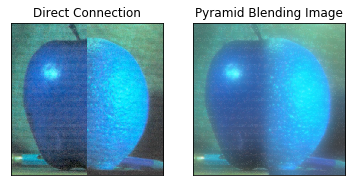

In [25]:
A = cv2.imread('./data/apple.jpg')
B = cv2.imread('./data/orange.jpg')

# generate Gaussian pyramid for A
G = A.copy()
gpA = [G]
for i in range(6):
    G = cv2.pyrDown(G)
    gpA.append(G)

# generate Gaussian pyramid for B
G = B.copy()
gpB = [G]
for i in range(6):
    G = cv2.pyrDown(G)
    gpB.append(G)

# generate Laplacian Pyramid for A
lpA = [gpA[5]]
for i in range(5,0,-1):
    GE = cv2.pyrUp(gpA[i])
    L = cv2.subtract(gpA[i-1],GE)
    lpA.append(L)

# generate Laplacian Pyramid for B
lpB = [gpB[5]]
for i in range(5,0,-1):
    GE = cv2.pyrUp(gpB[i])
    L = cv2.subtract(gpB[i-1],GE)
    lpB.append(L)

# Now add left and right halves of images in each level
LS = []
for la,lb in zip(lpA,lpB):
    rows,cols,dpt = la.shape
    ls = np.hstack((la[:,0:cols/2], lb[:,cols/2:]))
    LS.append(ls)

# now reconstruct
ls_ = LS[0]
for i in range(1,6):
    ls_ = cv2.pyrUp(ls_)
    ls_ = cv2.add(ls_, LS[i])

# image with direct connecting each half
real = np.hstack((A[:,:cols/2],B[:,cols/2:]))

plt.subplot(121),plt.imshow(real,cmap = 'gray')
plt.title('Direct Connection'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(ls_,cmap = 'gray')
plt.title('Pyramid Blending Image'), plt.xticks([]), plt.yticks([])